In [1078]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Data Description
* ID : Unique ID of each customer
* Year_Birth : Age of the customer
* Education : Customer's level of education
* Marital_Status : Customer's marital status
* Kidhome : Number of small children in customer's household
* Teenhome : Number of teenagers in customer's household
* Income : Customer's yearly household income
* Recency : Number of days since the last purchase
* MntFishProducts : The amount spent on fish products in the last 2 years
* MntMeatProducts : The amount spent on meat products in the last 2 years
* MntFruits : The amount spent on fruits products in the last 2 years
* MntSweetProducts : Amount spent on sweet products in the last 2 years
* MntWines : The amount spent on wine products in the last 2 years
* MntGoldProds : The amount spent on gold products in the last 2 years
* NumDealsPurchases : Number of purchases made with discount
* NumCatalogPurchases : Number of purchases made using catalog (buying goods to be shipped through the mail)
* NumStorePurchases : Number of purchases made directly in stores
* NumWebPurchases : Number of purchases made through the company's website
* NumWebVisitsMonth : Number of visits to company's website in the last month
* AcceptedCmp1 : 1 if customer accepted the offer in the first campaign, 0 otherwise
* AcceptedCmp2 : 1 if customer accepted the offer in the second campaign, 0 otherwise
* AcceptedCmp3 : 1 if customer accepted the offer in the third campaign, 0 otherwise
* AcceptedCmp4 : 1 if customer accepted the offer in the fourth campaign, 0 otherwise
* AcceptedCmp5 : 1 if customer accepted the offer in the fifth campaign, 0 otherwise
* AcceptedCmp6 : 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain : 1 If the customer complained in the last 2 years, 0 otherwise
* Country: Country customer belongs to

## Checking data and data manipulation

In [1079]:
df = pd.read_excel('..../marketing_campaign.xlsx')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [1080]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [1081]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

The missing values are extremely minimal and can be safely omitted.

In [1082]:
df.dropna(inplace = True)

In [1083]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Dealing with outliers

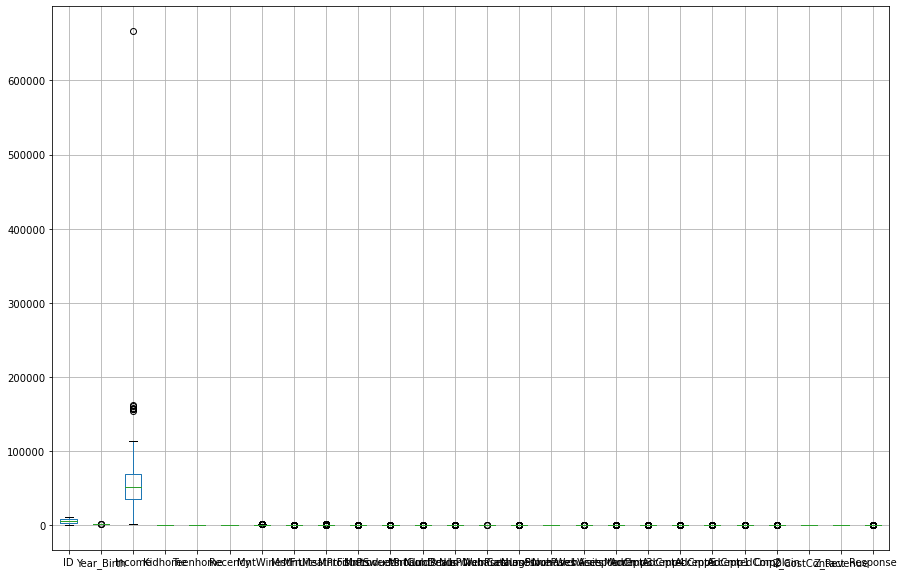

In [1084]:
fig, ax = plt.subplots(figsize=(15, 10))
df.boxplot(ax=ax);

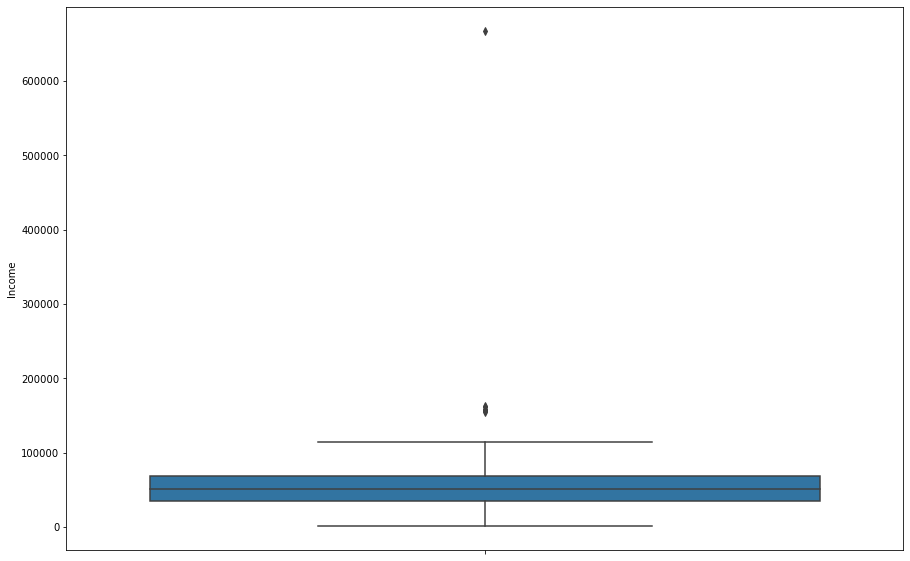

In [1085]:
plt.figure(figsize=(15, 10))
sns.boxplot(y = 'Income', data = df);

In [1086]:
IQR = np.quantile(df['Income'], 0.75) - np.quantile(df['Income'], 0.25)
lower_threshold = np.quantile(df['Income'], 0.25) - 1.5 * IQR
upper_threshold = np.quantile(df['Income'], 0.75) + 1.5 * IQR
outliers = df[(df['Income']< lower_threshold) | (df['Income'] > upper_threshold)]
print('Number of outliers', len(outliers))

Number of outliers 8


In [1087]:
df = df[~((df['Income']< lower_threshold) | (df['Income'] > upper_threshold))]

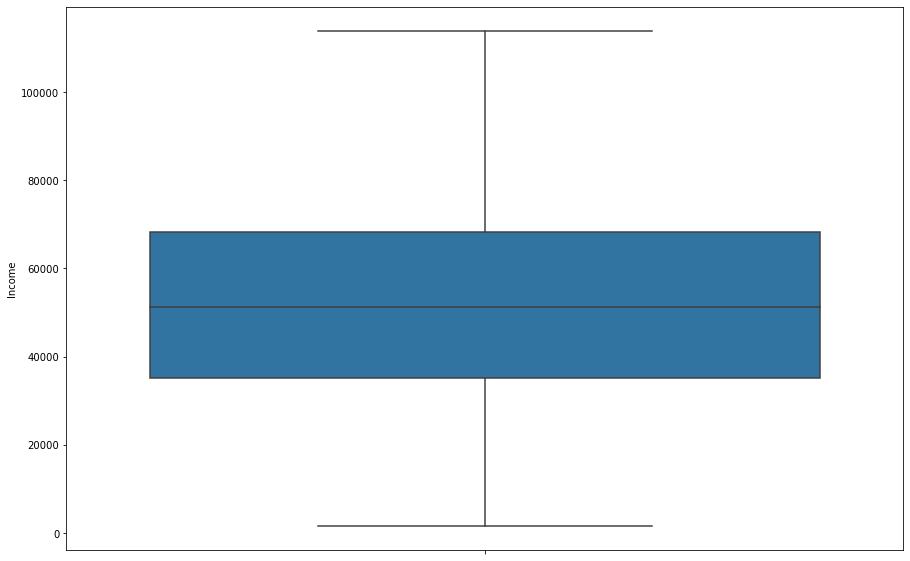

In [1088]:
plt.figure(figsize=(15, 10))
sns.boxplot(y = 'Income', data = df);

## Exploratory data analysis

We are going to figure out which features are objects, and which are float from all the features.

In [1089]:
object_cols = []
float_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        object_cols.append(col)
    elif df[col].dtype == 'float64':
        float_cols.append(col)
print('Number of onjects', len(object_cols))
print('Number of floats', len(float_cols))

Number of onjects 2
Number of floats 1


In [1090]:
object_cols

['Education', 'Marital_Status']

In [1091]:
float_cols

['Income']

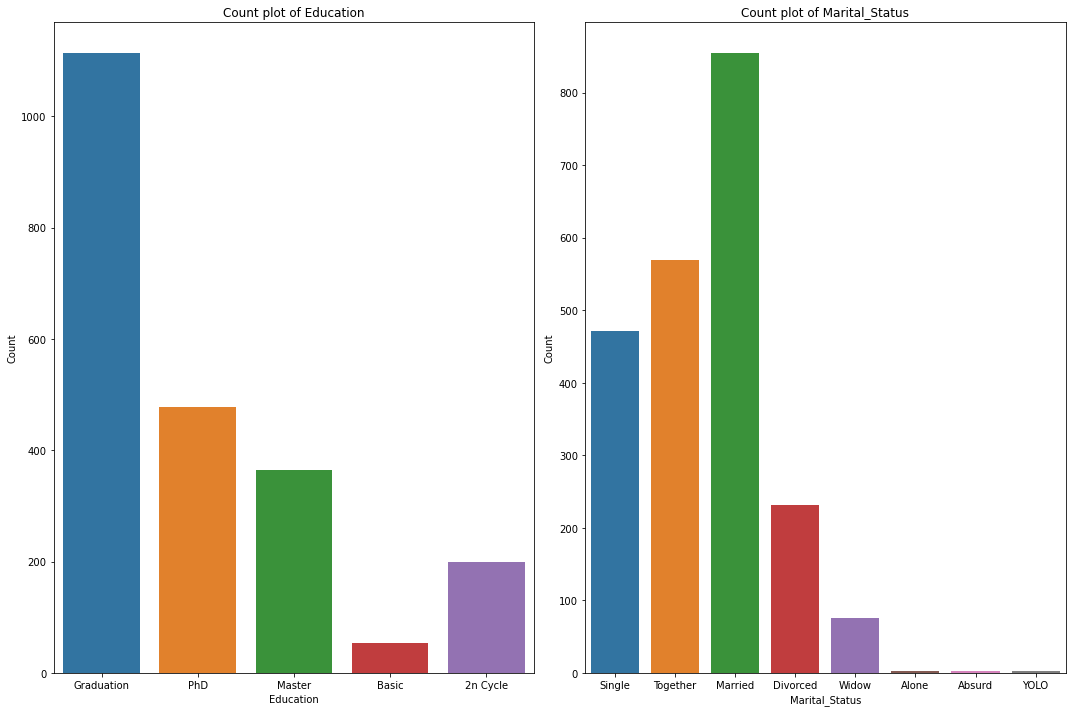

In [1092]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(object_cols):
    plt.subplot(1,len(object_cols),i+1)
    sns.countplot(x = col, data = df)
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout();


From these plots, we found out that most people have a high education, and they are married. 

In [1093]:
def education_level(education):
    if education in ['Graduation', 'PhD', 'Master']:
        return 'High'
    elif education in 'Basic':
        return 'Middle'
    else:
        return 'Low'
df['Education_level'] = df['Education'].apply(education_level)

In [1094]:
def status(marital_status):
    if marital_status in ['Alone', 'Absurd', 'YOLO']:
        return 'Living Alone'
    else:
        return 'Living With Others'
df['Status'] = df['Marital_Status'].apply(status)

Creating functions for future plots.

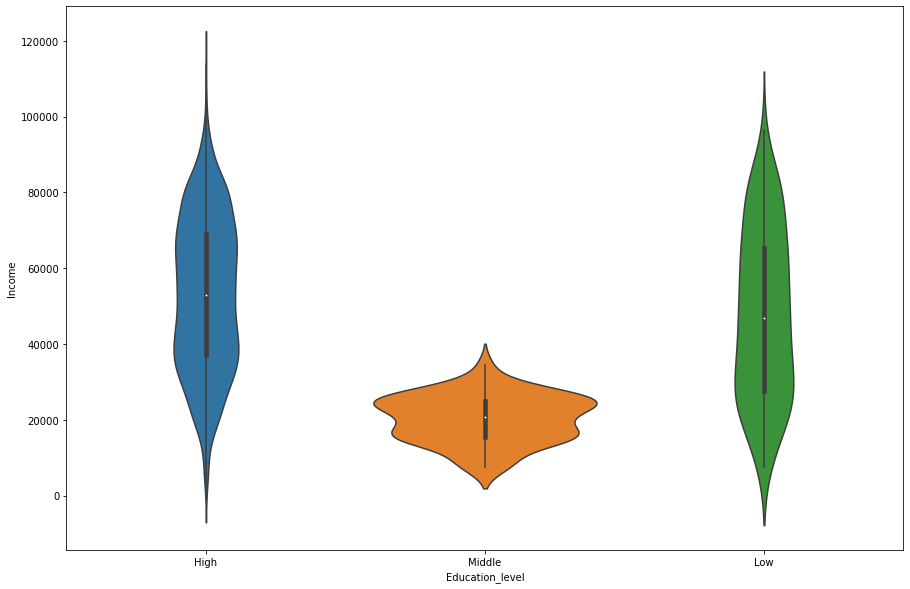

In [1095]:
plt.figure(figsize=(15, 10))
sns.violinplot(x = 'Education_level', y = 'Income', data = df);

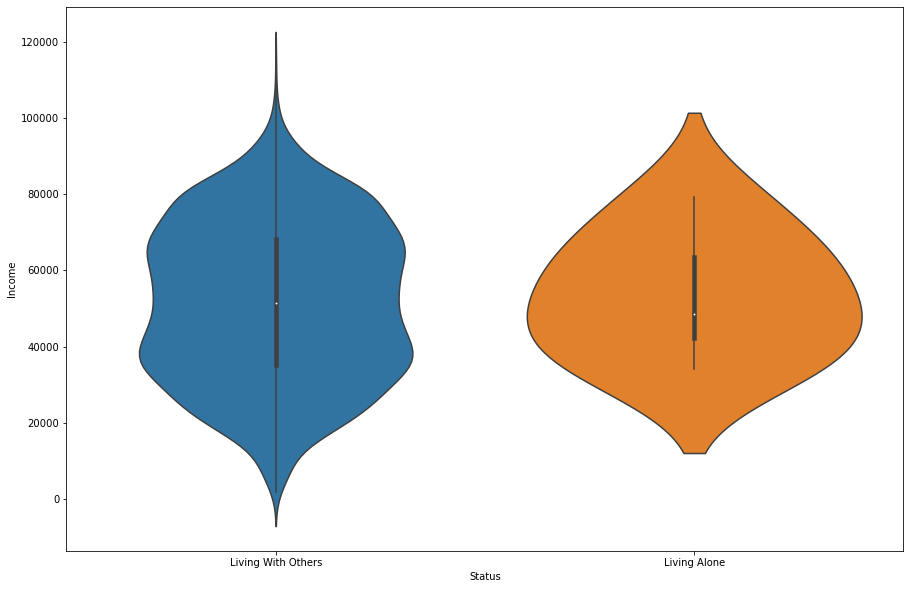

In [1096]:
plt.figure(figsize=(15, 10))
sns.violinplot(x = 'Status', y = 'Income', data = df);

Surprisingly people from high and low categories of education have practically the same interquartile range with a bit more income and higher probability within this range in a high category of education (also the tail in the latter is longer with more income). The lowest income has a middle category with a significant amount within the range. Comparing the second plot the tail of ‘living with others ’  is higher in contrast to ‘living alone ’, whereas there is a high probability in the latter to get an income of about 45000.

Converting the categorical values into the numerical values.

In [1097]:
for col in df.columns:
    if df[col].dtypes == 'object':
        lae = LabelEncoder()
        df[col] = lae.fit_transform(df[col])

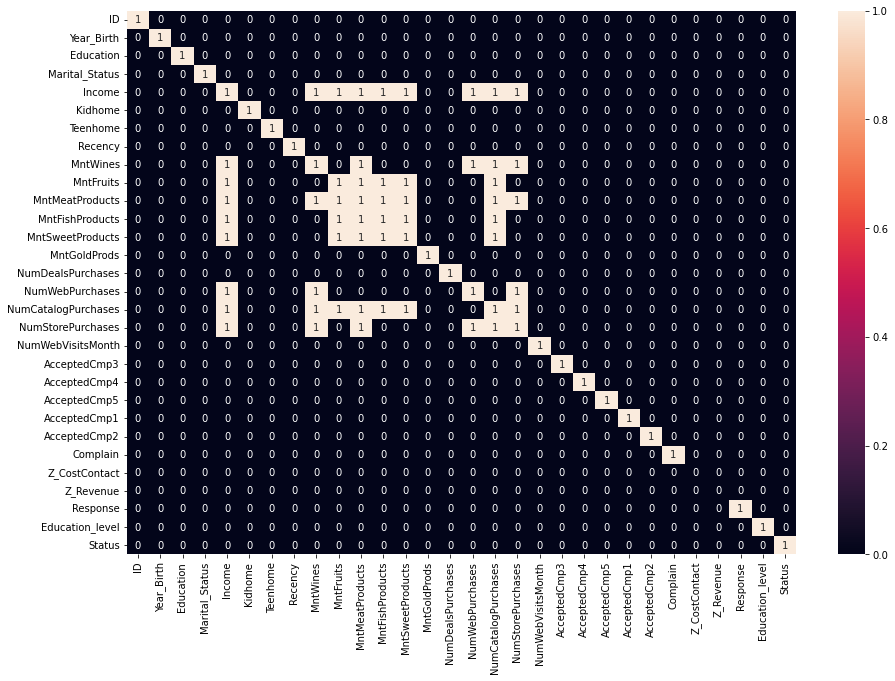

In [1098]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr()> 0.5, annot=True);

Showing which variables have a correlation of more than 0.5.

In [1099]:
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'],axis=1, inplace=True)

## PCA

In [1100]:
normal = Normalizer()
df_nm = normal.fit_transform(df)

In [1101]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_nm)
pca.explained_variance_ratio_

array([0.93269816, 0.04115058, 0.02307149])

As a result, we created 3 principal components. the first principal component explains 93% of the variance which is very significant.

## K-means++

In [1102]:
distance = []
for clusters in range(1,20):
    model = KMeans(init = 'k-means++', n_clusters = clusters,max_iter=400, random_state = 10)
    model.fit(df_pca)
    distance.append(model.inertia_)
distance

[38.337364224513024,
 18.08383225145961,
 9.805725069515642,
 6.1297565367591496,
 4.144617847135839,
 3.1670938869101333,
 2.5911813774247094,
 2.273975392135195,
 1.9727126164573772,
 1.7515219287260213,
 1.551565034292485,
 1.411772041123221,
 1.2725263801867928,
 1.183826275574076,
 1.1069615389159475,
 1.0501492836341009,
 0.9766605839724837,
 0.905805011172461,
 0.8450806997383428]

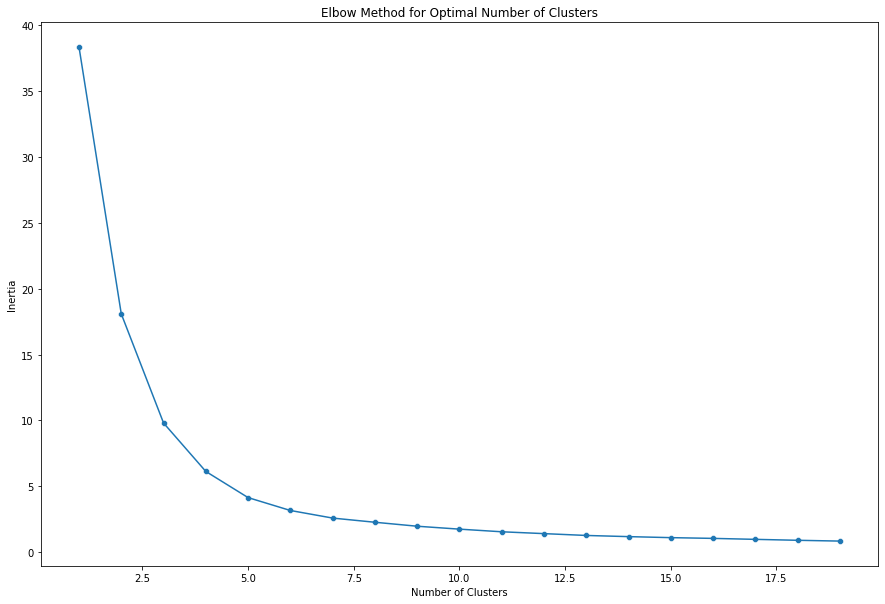

In [1103]:
plt.figure(figsize = (15,10))
sns.lineplot(x = range(1,20), y = distance)
sns.scatterplot(x = range(1,20), y = distance)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In accordance with the elbow method, we can deduce that an ideal choice for the number of clusters is 4. This conclusion arises from the observation that beyond 4, the rate of decline in inertia becomes notably less pronounced, indicating a diminishing return in variance reduction.

In [1104]:
model = KMeans(init = 'k-means++',n_clusters = 4,max_iter = 400, random_state = 2)
prediction = model.fit_predict(df_pca)
model.inertia_

6.1297565367591496

In [1105]:
silhouette_score(df_pca, prediction)

0.5250350741407777

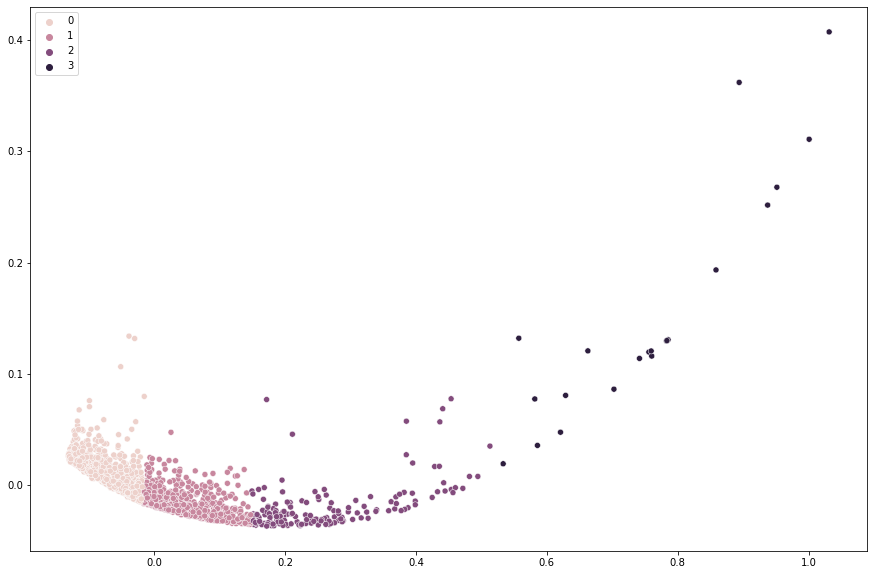

In [1106]:
plt.figure(figsize = (15,10))
sns.scatterplot(x =df_pca[:,0], y= df_pca[:,1], hue = prediction)
plt.show()

To sum up, we created an unsupervised K-means++ model using PCA. Therefore, the inertia is low whereas the silhouette score is more than 0.5 which indicating that the clusters are pretty well separated.